<a href="https://colab.research.google.com/github/YusukeAoki57/diveintocode-ml/blob/master/Spring5_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
iris=load_iris()
iris_data=pd.DataFrame(iris.data,columns=iris.feature_names)
print(iris_data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [448]:
#targetの生成
all_y=pd.DataFrame(iris.target)
all_y.columns=['Species']

#特徴量との結合
all_xy=pd.merge(iris_data,all_y,left_index=True, right_index=True)

#Targetのvirgicolorとvirginicaのみのデータの生成
part_columns=all_xy[all_xy['Species'] != 0]
print(part_columns)

#sepal_lengthとpetal_lengthのみのデータの生成
part_all1=part_columns.drop('sepal width (cm)', axis=1)
part_all=part_all1.drop('petal width (cm)', axis=1)



     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  Species
50                 7.0               3.2  ...               1.4        1
51                 6.4               3.2  ...               1.5        1
52                 6.9               3.1  ...               1.5        1
53                 5.5               2.3  ...               1.3        1
54                 6.5               2.8  ...               1.5        1
..                 ...               ...  ...               ...      ...
145                6.7               3.0  ...               2.3        2
146                6.3               2.5  ...               1.9        2
147                6.5               3.0  ...               2.0        2
148                6.2               3.4  ...               2.3        2
149                5.9               3.0  ...               1.8        2

[100 rows x 5 columns]


In [449]:
#numpyに変換
x=part_columns.drop('Species', axis=1).values
y=part_columns.iloc[:,-1].values

x2=part_all.drop('Species', axis=1).values
y2=part_columns.iloc[:,-1].values


#分割 4特徴量
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

#分割　2特徴量→グラフ用
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.5, random_state=0)
print(x_test2.shape)
print(y_test2.shape)
print(type(x_test2))
print(type(y_test2))

#訓練データの説明変数をfit（平均・分散を計算）
sc = StandardScaler()
sc.fit(x_train2)
#print(x_train_fit.var_)

#訓練データの説明変数をtransformで標準化
x_train3=sc.transform(x_train2)
#print(x_train_trf)

#テストデータの説明変数をtransformで標準化：fitについては訓練データで計算済であり、それがテストデータに使用される
x_test3=sc.transform(x_test2)


(50, 2)
(50,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [450]:
class ScratchSVMClassifier():
  def __init__(self, num_iter=5000, lr=1e-20, kernel='linear', threshold=0.70, verbose=False):
    # ハイパーパラメータを属性として記録
    self.iter = num_iter
    self.lr = lr
    self.kernel = kernel
    self.threshold = threshold
    self.verbose = verbose
  def _karnel(self,X):
    k=np.dot(X,X.T) #(n,j)*(j,n)=(n,n)
    return k

  def _gradient(self, X,y,lamd):
    
    for k in range(self.iter):   
    
    #微分
      y1=np.dot(y,y.T)
      k=self._karnel(X)
      yx=np.dot(y1,k) #(n,n)
      lamd=lamd+self.lr*(1-np.dot(lamd.T,yx).T) #(1,n)*(n,n)=(1,n).T
      np.where(lamd<0,0,lamd)
    print(lamd)

    xyl=np.concatenate([X,y,lamd],axis=1)    
      
    return lamd,xyl

  def fit(self, X, y, X_val=None, y_val=None):
    #yの加工
    y1,y2=np.unique(y)
    if y1>y2:
      self.large_y=y1
      self.small_y=y2
    elif y1<y2:
      self.large_y=y2
      self.small_y=y1
    print(self.large_y)
    y=np.where(y>np.mean(y),1,-1)
    y=y.reshape(y.shape[0],1)
    
    
    #lamdaの初期生成
    lamd=np.random.rand(X.shape[0],1) #(n,1)
   
    #微分計算
    lamd,xyl=self._gradient(X,y,lamd)
    
    #閾値超えのx,y,lの抽出
    self.xyl2=xyl[xyl[:,-1]>self.threshold]
   
    

    """
    SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。
    Parameters
     ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    y : 次の形のndarray, shape (n_samples, )
        訓練データの正解値
    X_val : 次の形のndarray, shape (n_samples, n_features)
        検証データの特徴量
    y_val : 次の形のndarray, shape (n_samples, )
        検証データの正解値
    """
    """
    if self.verbose:
      #verboseをTrueにした際は学習過程を出力
      print()
      pass
    """
  def predict(self, X):

    self.sv=self.xyl2[:,0:X.shape[1]] #(z,j)
    self.sv=self.sv.reshape(self.sv.shape[0],self.sv.shape[1])
    y=self.xyl2[:,-2] #(z,1)
    y=y.reshape(y.shape[0],1)
    print(y)
    lamd2=self.xyl2[:,-1] #(z,1)
    lamd2=lamd2.reshape(lamd2.shape[0],1)
    k=np.dot(self.sv,X.T) #(z,j)*(j,n)→(z,n)
    #print(k)
    a=lamd2*y #(z,1)
    print(a.shape)
    a=a.reshape(a.shape[0],1)
    #print(np.dot(k.T,a)) #(n,z)*(z,1)=(n,1) 
    y_pred=np.sign(np.dot(k.T,a)) #(n,z)*(z,1)→(n,1)
    print(y_pred.shape)

    for i in range(y_pred.shape[0]):
      if y_pred[i,0]==1:
        y_pred[i,0]=self.large_y
      elif y_pred[i,0]==-1:
        y_pred[i,0]=self.small_y
    y_pred2=np.array(y_pred)
    print(y_pred2.shape)
    return y_pred2
  def SV(self):
    return self.sv


In [451]:
ssvm=ScratchSVMClassifier()
ssvm.fit(x_train3,y_train2)

2
[[0.79437312]
 [0.56346371]
 [0.91923625]
 [0.69066808]
 [0.40711924]
 [0.79002752]
 [0.13120448]
 [0.66458458]
 [0.42943335]
 [0.17334181]
 [0.23923136]
 [0.38696246]
 [0.2256496 ]
 [0.42741306]
 [0.10924557]
 [0.87181274]
 [0.27740454]
 [0.32929152]
 [0.47572346]
 [0.72823479]
 [0.23750488]
 [0.24964494]
 [0.37134192]
 [0.33552053]
 [0.62779188]
 [0.17301323]
 [0.0577129 ]
 [0.2949529 ]
 [0.70335633]
 [0.09741633]
 [0.76182963]
 [0.40235435]
 [0.10289764]
 [0.24616059]
 [0.51720798]
 [0.25995787]
 [0.46176862]
 [0.37217752]
 [0.5887726 ]
 [0.32447507]
 [0.04898175]
 [0.93736428]
 [0.13534696]
 [0.08643051]
 [0.54705081]
 [0.69886975]
 [0.42585706]
 [0.44927308]
 [0.67505129]
 [0.64604731]]


In [459]:
y_pred=ssvm.predict(x_test3)

[[ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]]
(8, 1)
(50, 1)
(50, 1)


In [453]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    print(mesh.shape)
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    SV=model.SV()
    plt.scatter(SV[:,0], SV[:,1], c='yellow', linewidths=1.0, edgecolors='yellow')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

(285270, 2)
[[ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]]
(8, 1)
(285270, 1)
(285270, 1)


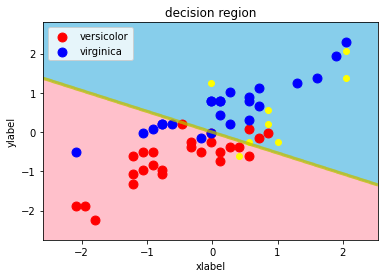

In [454]:
#y_test2=y_test2.reshape(y_test2.shape[0],1)
decision_region(x_test3,y_test2, model=ssvm)

In [455]:
#sk-learn
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train2, y_train2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [456]:
y_pred2=clf.predict(x_test3)

In [460]:
#Accuracy
from sklearn.metrics import accuracy_score
#スクラッチ
print(accuracy_score(y_test, y_pred))
#SC-learn
print(accuracy_score(y_test, y_pred2))

0.78
0.48


In [461]:
#Prececion
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))
print(precision_score(y_test, y_pred2))


0.7419354838709677
0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [463]:
#recall
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))
print(recall_score(y_test, y_pred2))

0.8846153846153846
0.0
